<a href="https://colab.research.google.com/github/pritiyadav888/AI-projects/blob/main/populationVS_housingvacancy_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [208]:
df_vaca_1 = pd.read_csv('https://raw.githubusercontent.com/pritiyadav888/Housing-datasets/main/3410012801_databaseLoadingData.csv')
df_vaca_2 = pd.read_csv('https://raw.githubusercontent.com/pritiyadav888/Housing-datasets/main/3410012901_databaseLoadingData.csv')
df_popul_1 = pd.read_csv('https://raw.githubusercontent.com/pritiyadav888/Housing-datasets/main/Population%20estimates_1.csv')
df_popul_2 = pd.read_csv('https://raw.githubusercontent.com/pritiyadav888/Housing-datasets/main/Population%20estimates_2.csv')

In [209]:
merged_vacan = pd.concat([df_vaca_1, df_vaca_2], join='inner')
merged_vacan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 1268
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       1503 non-null   int64  
 1   GEO            1503 non-null   object 
 2   DGUID          1503 non-null   object 
 3   UOM            1503 non-null   object 
 4   UOM_ID         1503 non-null   int64  
 5   SCALAR_FACTOR  1503 non-null   object 
 6   SCALAR_ID      1503 non-null   int64  
 7   VECTOR         1503 non-null   object 
 8   COORDINATE     1503 non-null   int64  
 9   VALUE          1164 non-null   float64
 10  STATUS         339 non-null    object 
 11  SYMBOL         0 non-null      float64
 12  TERMINATED     0 non-null      float64
 13  DECIMALS       1503 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 176.1+ KB


In [210]:
merged_popul = pd.concat([df_popul_1, df_popul_2], join='inner')
merged_popul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 0 to 1601
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       2412 non-null   int64  
 1   GEO            2412 non-null   object 
 2   DGUID          2259 non-null   object 
 3   Sex            2412 non-null   object 
 4   Age group      2412 non-null   object 
 5   UOM            2412 non-null   object 
 6   UOM_ID         2412 non-null   int64  
 7   SCALAR_FACTOR  2412 non-null   object 
 8   SCALAR_ID      2412 non-null   int64  
 9   VECTOR         2412 non-null   object 
 10  COORDINATE     2412 non-null   object 
 11  VALUE          2412 non-null   int64  
 12  STATUS         0 non-null      float64
 13  SYMBOL         0 non-null      float64
 14  TERMINATED     0 non-null      float64
 15  DECIMALS       2412 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 320.3+ KB


In [211]:
data_list = [df_vaca_1, df_vaca_2, df_popul_1, df_popul_2]

In [212]:
for i, df in enumerate(data_list):
    print("Dataset #{}: ".format(i))
    print(df.info())


Dataset #0: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       234 non-null    int64  
 1   GEO            234 non-null    object 
 2   DGUID          234 non-null    object 
 3   UOM            234 non-null    object 
 4   UOM_ID         234 non-null    int64  
 5   SCALAR_FACTOR  234 non-null    object 
 6   SCALAR_ID      234 non-null    int64  
 7   VECTOR         234 non-null    object 
 8   COORDINATE     234 non-null    int64  
 9   VALUE          226 non-null    float64
 10  STATUS         8 non-null      object 
 11  SYMBOL         0 non-null      float64
 12  TERMINATED     0 non-null      float64
 13  DECIMALS       234 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 25.7+ KB
None
Dataset #1: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 14 

In [213]:
for unique_regions, df in enumerate(data_list):
    print("Dataset #{}: ".format(unique_regions))
    print(df['GEO'].unique())

Dataset #0: 
['Belleville, Ontario' 'Cape Breton, Nova Scotia'
 'Charlottetown, Prince Edward Island' 'Chatham-Kent, Ontario'
 'Chilliwack, British Columbia' 'Cornwall, Ontario'
 'Drummondville, Quebec' 'Fredericton, New Brunswick' 'Granby, Quebec'
 'Grande Prairie, Alberta' 'Kamloops, British Columbia'
 'Kawartha Lakes, Ontario' 'Lethbridge, Alberta' 'Medicine Hat, Alberta'
 'Nanaimo, British Columbia' 'Norfolk, Ontario' 'North Bay, Ontario'
 'Prince George, British Columbia' 'Red Deer, Alberta'
 'Saint-Hyacinthe, Quebec' 'Saint-Jean-sur-Richelieu, Quebec'
 'Sarnia, Ontario' 'Sault Ste. Marie, Ontario' 'Shawinigan, Quebec'
 'Vernon, British Columbia' 'Wood Buffalo, Alberta']
Dataset #1: 
['Alma, Quebec' 'Amos, Quebec' 'Baie-Comeau, Quebec'
 'Bathurst, New Brunswick' 'Bay Roberts, Newfoundland and Labrador'
 'Bonnyville No. 87, Alberta' 'Bracebridge, Ontario' 'Brighton, Ontario'
 'Brock, Ontario' 'Brockville, Ontario' 'Brooks, Alberta'
 'Campbell River, British Columbia' 'Campbellton, 

In [214]:
for unique_regions, df in enumerate(data_list):
    print("Dataset #{}: ".format(unique_regions))
    print(df['GEO'].nunique())

Dataset #0: 
26
Dataset #1: 
141
Dataset #2: 
90
Dataset #3: 
178


In [215]:
for data, df in enumerate(data_list):
    print("Dataset #{}: ".format(data))
    print(df.iloc[22])

Dataset #0: 
REF_DATE                                        2018
GEO              Charlottetown, Prince Edward Island
DGUID                                   2011S0504105
UOM                                             Rate
UOM_ID                                           257
SCALAR_FACTOR                                  units
SCALAR_ID                                          0
VECTOR                                       v733390
COORDINATE                                         7
VALUE                                            0.1
STATUS                                           NaN
SYMBOL                                           NaN
TERMINATED                                       NaN
DECIMALS                                           1
Name: 22, dtype: object
Dataset #1: 
REF_DATE                        2018
GEO              Baie-Comeau, Quebec
DGUID                   2011S0504406
UOM                             Rate
UOM_ID                           257
SCALAR_FACTOR          

In [216]:
# Rename columns for better understanding
def rename_columns(df):
    return df.rename(columns={'VALUE': 'value', 'GEO': 'geo', 'REF_DATE': 'year'})

In [218]:
merged_vacan = merged_vacan.rename(columns={'VALUE': 'value', 'GEO': 'geo', 'REF_DATE': 'year'})
merged_popul = merged_popul.rename(columns={'VALUE': 'value', 'GEO': 'geo', 'REF_DATE': 'year'})

In [219]:
merged_vacan.columns

Index(['year', 'geo', 'DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VECTOR', 'COORDINATE', 'value', 'STATUS', 'SYMBOL', 'TERMINATED',
       'DECIMALS'],
      dtype='object')

In [220]:
merged_popul.columns

Index(['year', 'geo', 'DGUID', 'Sex', 'Age group', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'value', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [221]:
vacancy_rates = merged_vacan.groupby('year')['value'].mean()
vacancy_rates

year
2014    4.553676
2015    5.143284
2016    5.515441
2017    4.777419
2018    4.017829
2019    4.001527
2020    3.441463
2021    2.799194
2022    2.307087
Name: value, dtype: float64

In [222]:
population_rates = merged_popul.groupby('year')['value'].mean()
population_rates

year
2014    908363.231343
2015    915297.186567
2016    925892.477612
2017    937324.503731
2018    950914.988806
2019    964929.313433
2020    975519.432836
2021    981070.246269
2022    999296.563433
Name: value, dtype: float64

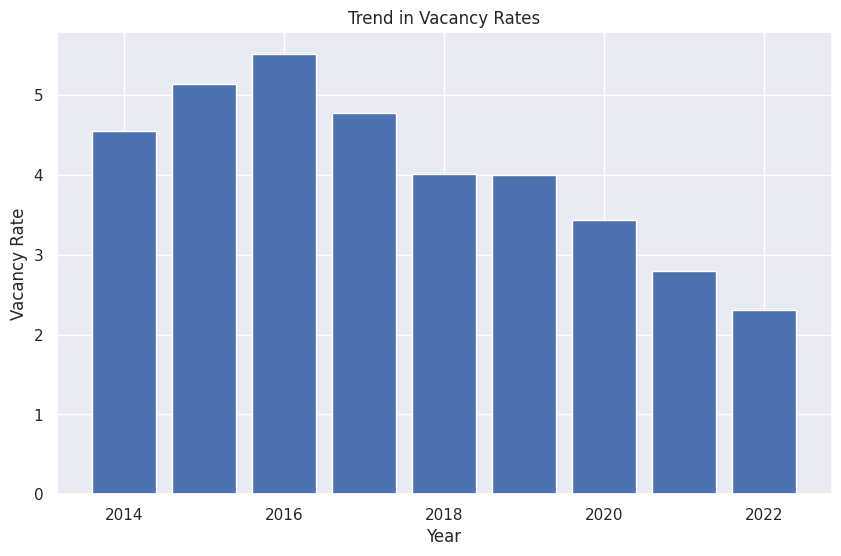

In [223]:
plt.bar(vacancy_rates.index, vacancy_rates.values)
plt.xlabel('Year')
plt.ylabel('Vacancy Rate')
plt.title('Trend in Vacancy Rates')
plt.show()

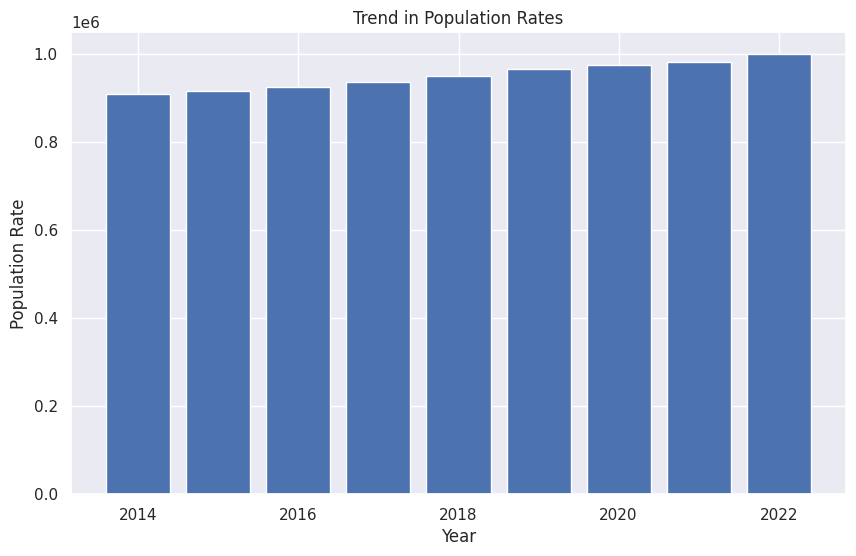

In [225]:
plt.bar(population_rates.index, population_rates.values)
plt.xlabel('Year')
plt.ylabel('Population Rate')
plt.title('Trend in Population Rates')
plt.show()

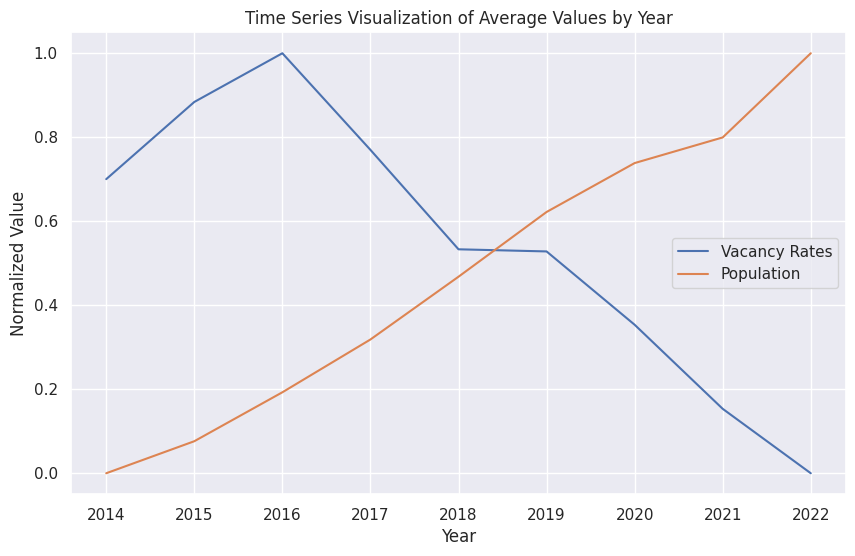

In [227]:
# Normalize the values to make them comparable
normalized_vacancy_rates = (vacancy_rates - vacancy_rates.min()) / (vacancy_rates.max() - vacancy_rates.min())
normalized_population_rates = (population_rates - population_rates.min()) / (population_rates.max() - population_rates.min())

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(normalized_vacancy_rates, label='Vacancy Rates')
plt.plot(normalized_population_rates, label='Population')

plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Time Series Visualization of Average Values by Year')
plt.legend()

plt.show()

In [228]:
# Drop unnecessary columns
def drop_columns(df):
  # Drop unnecessary columns
    columns_to_drop = ['STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']
    return df.drop(columns=columns_to_drop, errors='ignore')

merged_vacan = drop_columns(merged_vacan)
merged_popul = drop_columns(merged_popul)

In [230]:
# Check for missing values
print("Missing values in merged_vacan:", merged_vacan['value'].isna().sum())
print("Missing values in merged_popul:", merged_popul['value'].isna().sum())

# Handle missing values (fillna with 0 - change this to another method if you prefer)
merged_vacan['value'].fillna(0, inplace=True)

Missing values in merged_vacan: 0
Missing values in merged_popul: 0


In [231]:
# Descriptive statistics
print(merged_vacan.describe())
print(merged_popul.describe())

              year  UOM_ID  SCALAR_ID   COORDINATE        value
count  1503.000000  1503.0     1503.0  1503.000000  1503.000000
mean   2018.000000   257.0        0.0    76.958084     3.164937
std       2.582848     0.0        0.0    50.678633     4.176595
min    2014.000000   257.0        0.0     1.000000     0.000000
25%    2016.000000   257.0        0.0    29.000000     0.000000
50%    2018.000000   257.0        0.0    73.000000     1.800000
75%    2020.000000   257.0        0.0   124.000000     4.350000
max    2022.000000   257.0        0.0   165.000000    30.800000
              year  UOM_ID  SCALAR_ID         value
count  2412.000000  2412.0     2412.0  2.412000e+03
mean   2018.000000   249.0        0.0  9.509564e+05
std       2.582524     0.0        0.0  4.194443e+06
min    2014.000000   249.0        0.0  1.690000e+03
25%    2016.000000   249.0        0.0  2.966025e+04
50%    2018.000000   249.0        0.0  9.043050e+04
75%    2020.000000   249.0        0.0  3.202048e+05
max    2

In [232]:
# Calculate average vacancy rates before and after 2019
before_covid = merged_vacan[merged_vacan['year'] < 2019]
after_covid = merged_vacan[merged_vacan['year'] >= 2019]

avg_vacancy_before_covid = before_covid['value'].mean()
avg_vacancy_after_covid = after_covid['value'].mean()

change_in_vacancy = avg_vacancy_after_covid - avg_vacancy_before_covid

print("Average vacancy rate before COVID-19:", avg_vacancy_before_covid)
print("Average vacancy rate after COVID-19:", avg_vacancy_after_covid)
print("Change in vacancy rate:", change_in_vacancy)

Average vacancy rate before COVID-19: 3.7955688622754487
Average vacancy rate after COVID-19: 2.3766467065868264
Change in vacancy rate: -1.4189221556886222


In [233]:
# Group by 'year' and 'GEO' columns, then calculate the mean of 'value' column
avg_yearly_population_by_region = merged_popul.groupby(['year', 'geo'])['value'].mean()

# Display the average yearly income by region
print(avg_yearly_population_by_region)

year  geo                                                                          
2014  Abbotsford - Mission (CMA), British Columbia                                      180615.0
      Abitibi-Témiscamingue, Quebec                                                     147734.0
      Alberta                                                                          4083648.0
      All areas outside census metropolitan areas and census agglomerations, Canada    6011922.0
      All census agglomerations, Canada                                                4341356.0
                                                                                         ...    
2022  Yellowknife (CA), Northwest Territories                                            22983.0
      Yorkton (CA), Saskatchewan                                                         19399.0
      Yorkton-Melville, Saskatchewan                                                     84340.0
      Yukon                                

In [234]:
# Filter the average yearly population data for the years before and after 2019
population_before_2019 = avg_yearly_population_by_region.loc[2014:2018].groupby('geo').mean()
population_after_2019 = avg_yearly_population_by_region.loc[2019:].groupby('geo').mean()

# Calculate the percentage change between these two periods for each region
population_change_percentage = ((population_after_2019 - population_before_2019) / population_before_2019) * 100

# Display the population increment and decrement percentage for each region
print(population_change_percentage)

geo
Abbotsford - Mission (CMA), British Columbia                                      8.627770
Abitibi-Témiscamingue, Quebec                                                     0.368213
Alberta                                                                           5.934591
All areas outside census metropolitan areas and census agglomerations, Canada     2.156288
All census agglomerations, Canada                                                 4.122762
                                                                                   ...    
Yellowknife (CA), Northwest Territories                                           7.237381
Yorkton (CA), Saskatchewan                                                        0.034690
Yorkton-Melville, Saskatchewan                                                   -1.844062
Yukon                                                                            10.181754
Yukon, Yukon                                                                     10.18

In [235]:
# Filter the average yearly population data for the years before and after 2019
population_before_2019 = avg_yearly_population_by_region.loc[2014:2018].groupby('geo').mean()
population_after_2019 = avg_yearly_population_by_region.loc[2019:].groupby('geo').mean()

# Calculate the percentage change between these two periods for each region
population_change_percentage = ((population_after_2019 - population_before_2019) / population_before_2019) * 100

# Convert the population increment and decrement percentage for each region to a dictionary
population_change_percentage_dict = population_change_percentage.to_dict()

# Display the population increment and decrement percentages with region names, in a vertical format
for region, percentage in population_change_percentage_dict.items():
    print(f"{region}: {percentage}")


Abbotsford - Mission (CMA), British Columbia: 8.627769799855875
Abitibi-Témiscamingue, Quebec: 0.36821332306507115
Alberta: 5.934591308972825
All areas outside census metropolitan areas and census agglomerations, Canada: 2.1562884618119793
All census agglomerations, Canada: 4.12276217620391
All census metropolitan areas and census agglomerations, Canada: 6.26973995540249
All census metropolitan areas, Canada: 6.637479776479456
Alma (CA), Quebec: 0.3009727000770547
Annapolis Valley, Nova Scotia: 2.4077868040733974
Area outside census metropolitan areas and census agglomerations, Alberta: -0.1782402501059771
Area outside census metropolitan areas and census agglomerations, British Columbia: 4.106069966130193
Area outside census metropolitan areas and census agglomerations, Manitoba: 3.3680960457966718
Area outside census metropolitan areas and census agglomerations, New Brunswick: 0.6670834875594134
Area outside census metropolitan areas and census agglomerations, Newfoundland and Labrad

In [236]:
merged_vacan['geo'].unique()

array(['Belleville, Ontario', 'Cape Breton, Nova Scotia',
       'Charlottetown, Prince Edward Island', 'Chatham-Kent, Ontario',
       'Chilliwack, British Columbia', 'Cornwall, Ontario',
       'Drummondville, Quebec', 'Fredericton, New Brunswick',
       'Granby, Quebec', 'Grande Prairie, Alberta',
       'Kamloops, British Columbia', 'Kawartha Lakes, Ontario',
       'Lethbridge, Alberta', 'Medicine Hat, Alberta',
       'Nanaimo, British Columbia', 'Norfolk, Ontario',
       'North Bay, Ontario', 'Prince George, British Columbia',
       'Red Deer, Alberta', 'Saint-Hyacinthe, Quebec',
       'Saint-Jean-sur-Richelieu, Quebec', 'Sarnia, Ontario',
       'Sault Ste. Marie, Ontario', 'Shawinigan, Quebec',
       'Vernon, British Columbia', 'Wood Buffalo, Alberta',
       'Alma, Quebec', 'Amos, Quebec', 'Baie-Comeau, Quebec',
       'Bathurst, New Brunswick',
       'Bay Roberts, Newfoundland and Labrador',
       'Bonnyville No. 87, Alberta', 'Bracebridge, Ontario',
       'Brighton,

In [237]:
merged_popul['geo'].unique()

array(['Canada', 'Newfoundland and Labrador',
       'Avalon Peninsula, Newfoundland and Labrador',
       'South Coast-Burin Peninsula, Newfoundland and Labrador',
       'West Coast-Northern Peninsula-Labrador, Newfoundland and Labrador',
       'Notre Dame-Central Bonavista Bay, Newfoundland and Labrador',
       'Prince Edward Island',
       'Prince Edward Island, Prince Edward Island', 'Nova Scotia',
       'Cape Breton, Nova Scotia', 'North Shore, Nova Scotia',
       'Annapolis Valley, Nova Scotia', 'Southern, Nova Scotia',
       'Halifax, Nova Scotia', 'New Brunswick',
       'Campbellton-Miramichi, New Brunswick',
       'Moncton-Richibucto, New Brunswick',
       'Saint John-St. Stephen, New Brunswick',
       'Fredericton-Oromocto, New Brunswick',
       'Edmundston-Woodstock, New Brunswick', 'Quebec',
       'Gaspésie-Îles-de-la-Madeleine, Quebec',
       'Bas-Saint-Laurent, Quebec', 'Capitale-Nationale, Quebec',
       'Chaudière-Appalaches, Quebec', 'Estrie, Quebec',
  

In [207]:
# Create a function to extract the province name from the 'geo' column
def extract_province(geo):
    provinces = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Nunavut']
    for province in provinces:
        if province in geo:
            return province
    return None

# Apply the extract_province function to each dataset
merged_popul['province'] = merged_popul['geo'].apply(extract_province)
merged_vacan['province'] = merged_vacan['geo'].apply(extract_province)

# Group the data by 'province' and 'year' and calculate the mean (or sum) for each group
grouped_popul = merged_popul.groupby(['province', 'year']).sum().reset_index()
grouped_vacan = merged_vacan.groupby(['province', 'year']).mean().reset_index()

# Merge the two datasets on the 'province' and 'year' columns
merged_data = pd.merge(grouped_vacan, grouped_popul, on=['province', 'year'])

# Calculate percentage changes and add as new columns
merged_data['population_change_pct'] = merged_data.groupby('province')['value_y'].pct_change() * 100
merged_data['vacancy_rate_change_pct'] = merged_data.groupby('province')['value_x'].pct_change() * 100

# Create a D3 visualization using Plotly
fig = px.line(merged_data, x='year', y='population_change_pct', color='province')
fig.update_layout(title='Population Change Over Years by Province', xaxis_title='Year', yaxis_title='Population Change (%)')
fig.show()

fig = px.line(merged_data, x='year', y='vacancy_rate_change_pct', color='province')
fig.update_layout(title='Vacancy Rate Change Over Years by Province', xaxis_title='Year', yaxis_title='Vacancy Rate Change (%)')
fig.show()


<ipython-input-207-4ed0986278f0>:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-207-4ed0986278f0>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



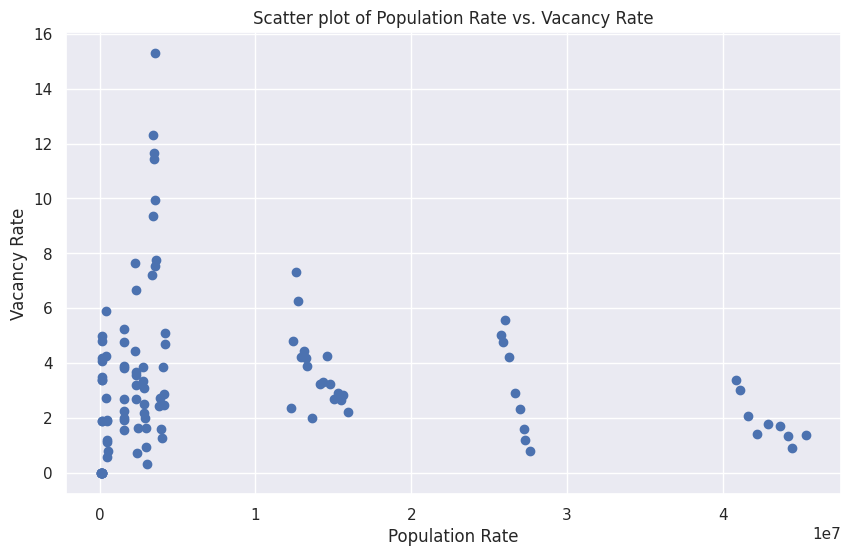

Correlation Coefficient: -0.111812681395841


In [238]:
# Plot the scatter plot to visualize the correlation between population and vacancy rates
plt.scatter(merged_data['value_y'], merged_data['value_x'])
plt.xlabel('Population Rate')
plt.ylabel('Vacancy Rate')
plt.title('Scatter plot of Population Rate vs. Vacancy Rate')
plt.show()

# Compute the correlation coefficient
corr_coef = np.corrcoef(merged_data['value_y'], merged_data['value_x'])[0,1]
print("Correlation Coefficient:", corr_coef)

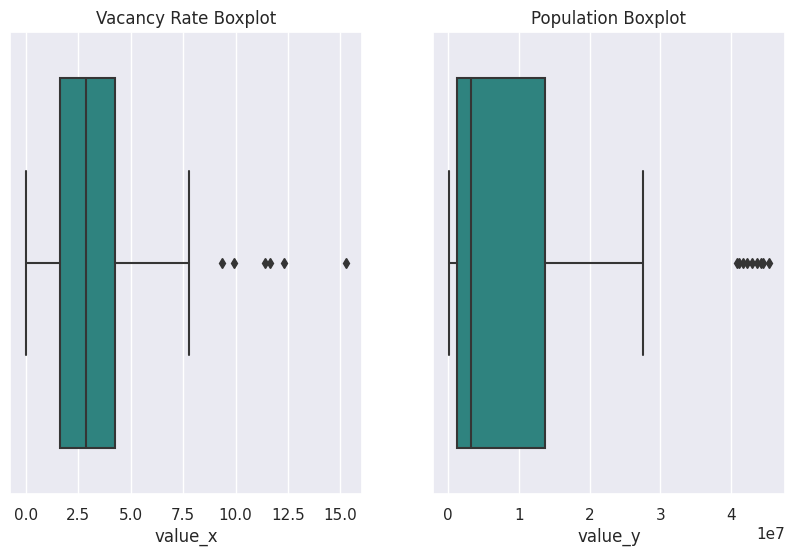

In [240]:
# Plot boxplots to check for outliers
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
sns.boxplot(x=merged_data['value_x'], palette='viridis')
plt.title('Vacancy Rate Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(x=merged_data['value_y'], palette='viridis')
plt.title('Population Boxplot')
plt.show()